In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Machine Learning - Aufgabenblatt 4

`sklearn` hat auch ein Neural Network Modell (https://scikit-learn.org/stable/modules/neural_networks_supervised.html), in der Praxis werden aber oft ausgereiftere `Deep Learning` Libraries verwendet, wie `tensorflow` (Google) oder `PyTorch` (Facebook).

Darum verwenden wir für diese Aufgabe `tensorflow` und nicht `sklearn`.

In [2]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# random seed fixieren für Musterlösung 
tf.random.set_seed(42)

Damit wir Dinge von den vorherigen Aufgabenblätter nicht zu fest wiederholen, haben wir hier bereits den `Datensatz` und eine `Baseline` vorbereitet.

## Datensatz - MNIST

Wir können den Datensatz über `sklearn.datasets.fetch_openml` laden.

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(np.int32) # Cast string like '1' to integer like 1.

/Users/mebr/PycharmProjects/cas_machine-learning-exercise/venv/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Wir skalieren die Pixelwerte zwischen 0 und 1 (anstatt 0 und 255). Dies ist wichtig für das `Gradient Descent` Lernverfahren.

In [4]:
print("Vorher:", X.max())
X = X / 255  # Sehr einfaches skalieren (oft aussreichend für Bilder)
print("Nach einfachem Skalieren:", X.max())

Vorher: 255.0
Nach einfachem Skalieren: 1.0


Anschliessend teilen wir die Daten wieder in `Train-Set`, `Validation-Set` und `Test-Set`.

In [5]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=5_000, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=5_000, stratify=y_data, random_state=42)

Und wir schauen uns Beispiele dieser handgeschriebenen Zahlen vom `Data-Set` an.

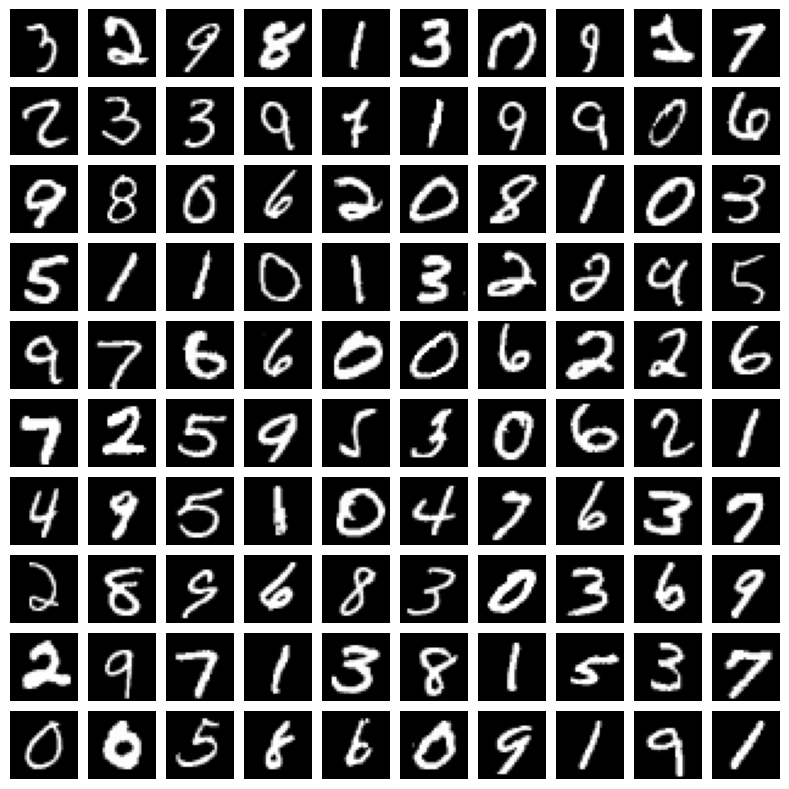

In [6]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
    nrows_ncols=(10, 10),  # creates 2x2 grid of axes
    axes_pad=0.1,  # pad between axes in inch.
)

for ax, im in zip(grid, X_data.reshape(-1, 28, 28)):
    ax.axis('off')
    ax.imshow(im, cmap='gray')

plt.show()

Wie es bei der `Classification` eigentlich immer Sinn gibt, schauen wir uns die Verteilung der Zielvariable an:

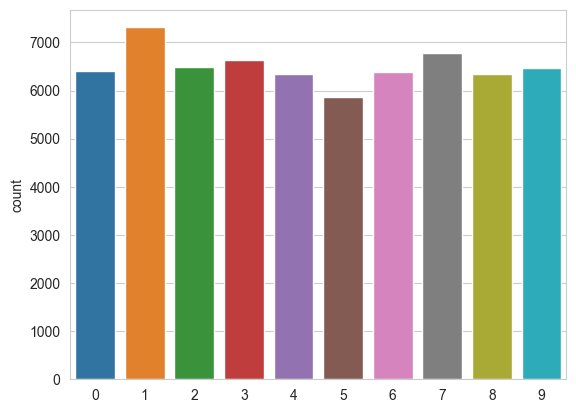

In [7]:
sns.countplot(x=y_data)
plt.show()

Und sehen, dass wir in etwa gleich viele Datenpunkt pro Klasse haben.

## Aufgabe 1 - Logistische Regression als Neural Network

In Aufgabe 1 bauen wir die `Logistische Regression` (die `Baseline` aus der Aufgabenbeschreibung) als `Neurales Netzwerk` nach. Anschliessend trainieren und evaluieren wir das Netzwerk.

Dieses `Neurales Netzwerk` hat noch keinen `Hidden Layer` und ist dadurch ein lineares Modell. Es entspricht (bis auf wie es trainiert wird) der `Logistischen Regression` von `sklearn` und wir erwarten daher in Aufgabe 1 (noch) keine Verbesserung zur `Baseline`.

In der Aufgabe 2 schauen wir uns dann ein `Neurales Netz` mit einem `Hidden Layer` mit nicht linearer Aktivierungsfunktion an - ein nicht lineares Modell.

### Aufgabe 1.1 - Logistische Regression als (Feed Forward) Neural Network

1. Erstellen Sie ein sequenzielles Neurales Netzwerk mittels `tf.keras.Sequential`
2. Fügen Sie einen Input Layer `tf.keras.layers.InputLayer` mit der shape `input_shape=(28*28,)` hinzu mittels `model.add`.
3. Fügen Sie einen Output Layer `tf.keras.layers.Dense` mit `units=10` und der Softmax Aktivierungsfunktion `activation=tf.keras.activations.softmax` hinzu mittels `model.add`.
4. Geben Sie eine Beschreibung des Modell mittels `print(model.summary())` aus. Das Modell sollte 7850 totale Parameter haben.
5. (Extra) Rechnen Sie die Anzahl Parameter von Hand nach.

Zur Illustration ist das Neurale Netzwerk von Aufgabe 1 hier grafisch abgebildet. Es hat 784 Inputs ($x_1$, ..., $x_{784}$) für jeden Pixel ein Input (28 * 28 = 784) und 10 Ouputs ($\hat y_0$, ..., $\hat y_9$) für jede `Klasse` (Ziffer) einen Output.

![Logistische Regression als Neural Network](./img/logistic-regression-as-nn-mnist.png)


#### Hilfreiche Links

* tf.keras.Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [9]:
import tensorflow as tf

# TODO

### Aufgabe 1.2 - `model.compile`, `model.fit`

In Aufgabe 1.1 haben wir das Netzwerk erstellt und mit `model.summary()` überprüft.

Nun möchten wir das Modell trainieren (`fit`).

Dazu müssen wir dem Modell mitteilen, welches Optimierungsverfahren (`optimizer`) und welche Kostenfunktion (`loss`) wir für das Training verwenden möchten.

In der `Logistischen Regression` von `sklearn` sind diese Werte im Modell hard-codiert vorgegeben und man kann sie nicht überschreiben. 
`Neurale Netze` von `tensorflow` können mit unterschiedlichen Kostenfunktionen (`tf.keras.losses`) und unterschiedlichen Optimiertungsverfahren (z.B. `adam`) trainiert werden. Darum muss man diese Werte für ein `tensorflow` Modell noch angeben.

1. Erstellen Sie eine `tf.keras.losses.SparseCategoricalCrossentropy` Funktion mit `from_logits=False`.
2. Kompilieren Sie das Modell mit `model.compile`. Geben Sie die `loss` Funktion und den `optimizer` an. Für den `optimizer` können Sie `sgd` für das `Batch Gradient Descent` Verfahren oder `adam` für `Adam` ein verbessertes `Batch Gradient Descent` Verfahren.
3. Trainieren Sie das Modell mittels `model.fit`. Wir müssen eine Batch Size `batch_size=64` und die Anzahl Epochen `epochs=15` mitgeben:
    - `batch_size`: Wie viele Datenpunkte werden für einen Schritt im `Batch Gradient Descent` Verfahren verwendet.
    - `epochs`: Wie oft iterieren wir über das gesamte `Train-Set`.
4. Berechnen Sie die Wahrscheinlichkeiten der Klassen `y_val_hat_prob` auf dem `Validation-Set` (`X_val`) mittels `model.predict`.
    - Anders als die Logistische Regression gibt uns `model.predict` hier 10 Outputs, **die Wahrscheinlichkeiten** für jede `Klasse`.
5. Holen Sie die tatsächliche Vorhersagen `y_val_hat` aus den Wahrscheinlichkeiten `y_val_hat_prob` aus Schritt 2. Die tatsächliche Vorhersage ist der Output mit dem grössten Wert (der grösste Wahrscheinlichkeit).
    - Nutzen Sie dazu `np.argmax` über die zweite Achse `axis=1`.
    - Geben Sie die `shape` von `y_val_hat_prob` und von `y_val_hat` aus, um besser zu verstehen, was wir genau machen.
6. Berechnen Sie die Genauigkeit unseres Modelles mittels `accuracy_score`.
7. Berechnen Sie die Confusion Matrix mittels `confusion_matrix`.

In [10]:
# TODO

### Schlusswort Aufgabe 1

In der Aufgabe 1 haben wir eine `Logistische Regression` als `Neurales Netzwerk` "nachgebaut", trainiert und evaluiert.

Wir haben dafür `tensorflow` kennengelernt und können in Aufgabe 2 unser neues Wissen nutzen und ein `Neurales Netz` mit einem `Hidden Layer` entwickeln.

### Aufgabe 2

#### Aufgabe 2.1 - (Feed-Forward) Neural Network mit einem Hidden Layer

Ziel dieser Aufgabe ist es folgendes Neurales Netzwerk zu bauen:

![One-Hidden-Layer (mit 36 Neuronen) Neural Network für MNIST](./img/nn-one-hidden-mnist.png)

1. Erstellen Sie das dargestellte Neurale Netzwerk. Achten Sie darauf, dass der `Hidden Layer` eine `Aktivierungsfunktion` mittels dem Parameter `activation` benötigt. Verwenden Sie `tf.keras.activations.relu` oder `tf.keras.activations.gelu`. Der Hidden Layer hat 36 Neuronen `units=36`. In der Praxis nimmt man eher eine Zweierpotzent wie 32, 64 oder 128 (aus Performanzgründen).
2. Geben Sie eine Beschreibung des Modell mittels `print(model.summary())` aus. Das Modell sollte **28'630 totale Parameter** haben.
3. Kompilieren Sie das Modell analog zur Aufgabe 1.
4. Trainieren Sie das Modell auf dem `Train-Set`.
5. Evaluieren Sie das Modell auf dem `Validation-Set`.

In [11]:
# TODO

## (Extra) Aufgabe 3 - CNN

Mit Bildern werden im Deep Learning oft `Convolutional Neural Networks` (`CNN`) eingesetzt.

CNNs sind laut Drehbuch nicht Teil vom Inhalt von diesem Modul, für interessierte zeigt diese Aufgabe wie man sie einsetzt.  

Anders als beim Feed-Forward Neural Network (Aufgabe 2) legen wir nicht Masken über den gesamten Input sondern legen eine kleine Maske (z.B. 3*3 Pixel) und sliden diese über das gesamte Bild. Die Output-Werte dieses Verfahrens sind dann die Aktivierungen (Features) dieser Maske an den verschiedenen Stellen im Bild. 

Mehr zu CNNs finden Sie hier: https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

1. Machen Sie ein Modell mit `tf.keras.layers.Conv2D` Layers.

In [12]:
# TODO